## Guía 2 - Ejercicio Computacional
### Simulación de la medición de una fuente luminosa con un detector de eficiencia e < 1
Esteban Lizaso - Libreta: 319/11

Primero importo las librerías que voy a utilizar a los largo del ejercicio.

In [8]:
from random import random
import numpy as np
import math
from scipy.special import comb
import matplotlib
from matplotlib import pyplot as plt

Defino las funciones que voy a utilizar en los diferentes items.

In [9]:
# Distribucion binomial con k exitos de n repeticiones, con probabilidad p.
def kbinomial(k,n,p):
    B = comb(n,k,exact=True)*(p**k)*((1-p)**(n-k))
    return B

# Distribucion de Poisson con k exitos y donde mu es la esperanza.
def kpoisson(k,u):
    P = math.exp(-u)*(u**k)/math.factorial(k)
    return P


### Item 1
Defino una función que realiza n experimentos de Bernoulli con probabilidad p. El programa genera un número al azar (con distribución uniforme entre 0 y 1) y cuenta la cantidad de veces que salen números menores a p (exitos) y mayores a p (fracasos).

Para mostrar que el programa entrega un número en [0,p) con probabilidad p, calculamos a modo de ejemplo más abajo los exitos, los fracasos, y estimamos la probabilidad de los mismos como el cociente entre exitos (o fracasos) sobre la cantidad de intentos.

In [10]:
def experimento(n,p):
    i=0
    a=0
    c=0
    b=0
    data=[]
    while i < n:
        a=random()
    #print(a)
        if a < p:
        #print('es menor')
            c=c+1
            data.append(a)
        else:
        #print('es mayor o igual')
            b=b+1
            data.append(a)
        i=i+1
    return c, b



n=100
p=0.6
exitos, fracasos = experimento(n,p)

print('Exitos - ', exitos)
print('Fracasos - ', fracasos)
print('Exitos/Intentos -', exitos/n,'       p = ', p)
print('Fracasos/Intentos -', exitos/n,'     q = ', 1-p)

Exitos -  64
Fracasos -  36
Exitos/Intentos - 0.64        p =  0.6
Fracasos/Intentos - 0.64      q =  0.4


### Item 2
Se utilizó el programa escrito en el item anterior para simular N experimentos de n fotones llegando a un detector con eficiencia p. Se realizó un histograma con los datos de los N = 1000 experimentos y se simuló de forma teórica la distribución correspondiente (binomial con 0 < k < n=15 y p = 0.75). Se ve en el gráfico que ambas son muy similares (lo que se esperaba).

*Nota: las barras de error del histogama se comentarán más adelante.*

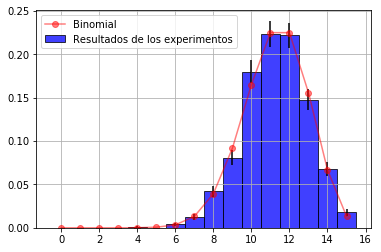

In [11]:
n=15
p=0.75
N=1000
datos=[]
for j in range(N):
    exitos, fracasos = experimento(n,p)
    datos.append(exitos)
    
  
n1, bins, patches = plt.hist(datos, range(0,n+2), density=True, align='left', facecolor='blue', edgecolor='black', alpha=0.75)

x=[]
y=[]
for i in range(n+1):
    x.append(i)
    y.append(kbinomial(i,n,p))

plt.plot(x,y,color='red', marker='o', alpha=0.5)
errory1 = np.sqrt(n1/N)
plt.bar(x, n1, width=1, yerr=errory1,ecolor='black', alpha=0)
plt.legend(('Binomial','Resultados de los experimentos'))
plt.grid()

### Item 3
Primero defino una nueva función que simule una fuente que emite en promedio I = 15 fotones por segundo. Para esto se siguió la recomendación de dividir un intervalo de tiempo (Dt) en m intervalos más pequeños (dt) con m >> 1, aproximar la probabilidad de que la fuente emita un fotón como I * dt. Simulando la cantidad de fotones que se emitieron en cada dt, y sumando sobre todos los dt se obtuvo la emisión que realizaba la fuente en un determinado Dt (en este caso, 1 segundo).

Se despreció la probabilidad de emitir más de un fotón en un intervalo. Como la distribución de cada cuanto se emite un fotón es exponencial, si dt tiende a 0, la posibilidad de emitir 2 o más se hace despreciable. Para comprobarlo calculamos las probabilidad de emitir 0, 1, 2 y 3 fotones en un dado dt. Además sabemos que en cada dt tenemos un experimento de Bernoulli dado que la probabilidad de emitir un fotón en cada dt es **independiente** de lo que ocurrió en los tiempos anteriores.

Luego se uso dicha función para repetir este experimento de emisión de la fuente unas 1000 veces, y con estos valores se construyo un histograma. Nuevamente se simuló de forma teórica la distribución correspondiente (en este caso, Poisson con mu = I * Dt). Se la comparó con una distribución de Poisson porque p2 (probabilidad de emitir un fotón en dt) es **muy chica** pero m (divisiones de 1 segundo) es **muy grande**.

*Nota: las barras de error del histogama se comentarán más adelante.*


Probabilidad de que en un dado dt se emitan 0 fotones = 0.9851119396030626
Probabilidad de que en un dado dt se emita 1 foton = 0.014776679094045939
Probabilidad de que en un dado dt se emitan 2 fotones = 0.00011082509320534455
Probabilidad de que en un dado dt se emitan 3 fotones = 5.541254660267227e-07
En un delta de tiempo de 1 segundos se emitieron 15 fotones


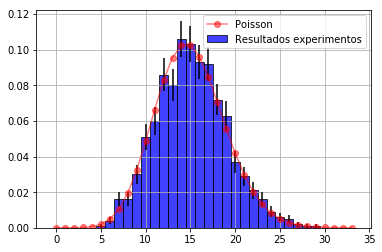

In [12]:
def fuente(I,Dt,m):
    dt=Dt/m
    p2=I*dt
    datos2=[]
    dt2=0
    while dt2 < Dt+dt:
        exitos, fracasos = experimento(1,p2)
        datos2.append(exitos)
        dt2 = dt2 + dt
    S = sum(datos2)
    return S

I=15
Dt=1
m=1000    
datos3=[]
dt=Dt/m

print()
print('Probabilidad de que en un dado dt se emitan 0 fotones =',kpoisson(0,I*dt))
print('Probabilidad de que en un dado dt se emita 1 foton =',kpoisson(1,I*dt))
print('Probabilidad de que en un dado dt se emitan 2 fotones =',kpoisson(2,I*dt))
print('Probabilidad de que en un dado dt se emitan 3 fotones =',kpoisson(3,I*dt))

print('En un delta de tiempo de',Dt,'segundos se emitieron',fuente(I,Dt,m),'fotones')

repeticion = 1000
for i in range(repeticion):
    fotones = fuente(I,Dt,m)
    datos3.append(fotones)
    

rango=35
matplotlib.pyplot.figure(2)
n2, bins2, patches2 = plt.hist(datos3, range(rango), density=True,align='left', facecolor='blue', edgecolor='black', alpha=0.75)



x=[]
y=[]
for i in range(rango-1):
    x.append(i)
    y.append(kpoisson(i,I*Dt))

plt.plot(x,y,color='red', marker='o', alpha=0.5)
errory2 = np.sqrt(n2/repeticion)
plt.bar(x, n2, width=1, yerr=errory2,ecolor='black', alpha=0)
plt.legend(('Poisson','Resultados experimentos'))
plt.grid()    

### Items 4 y 5

Luego de los 1000 experimentos del item anterior, usamos el programa experimento para calcular los fotones detectados por el detector del item 2. Realizamos el histograma de estos datos y lo comparamos nuevamente con una distribución teórica. En este caso la misma será una Poisson (teniendo en cuenta que es la composición de una poissoneana y una binomial). En la simulación teórica de la distribución se utilizó directamente una Poisson con mu = I * Dt * p.

Luego se realizó el experimento de la fuente emisora directamente como si tuviese un mu = I * Dt * p, que es equivalente a decir que tiene una probabilidad efectiva (I * Dt * p)/m   (que es equivalente a decir el producto de las probabilidades de los items 2 y 3, p * p2)
Se ve comparando ambos histogramas que da lo mismo realizar la composición de una poissoneana con una binomial, o directamente trabajar con una nueva poissoneana de mu = mu'*p (donde mu' es el mu de la poisssoneana original y p la eficiencia de un detector, por ejemplo).

*Nota: las barras de error del histogama se comentarán más adelante.*

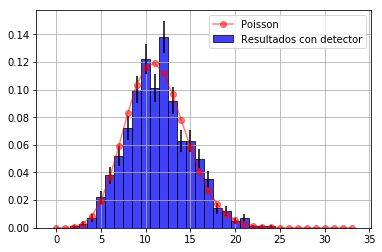

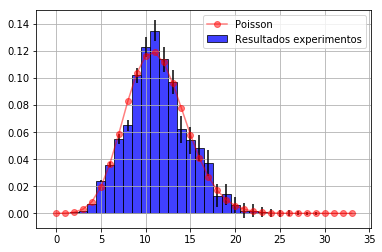

In [13]:
#Primero realizamos la composición de la binomial con la poissonenana.
datos4=[]
for i in range(repeticion):
    exitos, fracasos = experimento(datos3[i],p)
    datos4.append(exitos)

matplotlib.pyplot.figure(3)
n3, bins3, patches3 = plt.hist(datos4, range(35), density=True, align='left', facecolor='blue', edgecolor='black', alpha=0.75)

  
x=[]
y=[]
for i in range(rango-1):
    x.append(i)
    y.append(kpoisson(i,I*Dt*p))

plt.plot(x,y,color='red', marker='o', alpha=0.5)
errory3 = np.sqrt(n3/repeticion)
plt.bar(x, n3, width=1, yerr=errory3,ecolor='black', alpha=0)
plt.legend(('Poisson','Resultados con detector'))
plt.grid()

#-------------------------------------
#Luego, se realizó directamente el experimento como si hubiese sido una poissoneana de mu = I*p*Dt
#(para eso se usó una intensidad media igual a I*p)

datos5=[]
for i in range(repeticion):
    fotones, fracasos = experimento(m,I*Dt*p/m)
    datos5.append(fotones)
    

rango=35
matplotlib.pyplot.figure(2)
n5, bins5, patches5 = plt.hist(datos5, range(rango), density=True,align='left', facecolor='blue', edgecolor='black', alpha=0.75)



x=[]
y=[]
for i in range(rango-1):
    x.append(i)
    y.append(kpoisson(i,I*Dt*p))

plt.plot(x,y,color='red', marker='o', alpha=0.5)
errory5 = np.sqrt(n5/repeticion)
plt.bar(x, n5, width=1, yerr=errory2,ecolor='black', alpha=0)
plt.legend(('Poisson','Resultados experimentos'))
plt.grid()

### Item 6

En el número de datos de un determinado bin de un histograma esperamos una distribución poissoneana siempre y cuando podamos decir que se realizaron muchos experimentos (como fue en todos estos casos) con una probabilidad baja.
El problema con utilizar ete criterio se puede encontrar en casos donde se realizan pocos experimentos, y también en los bins que poseen mayor probabilidad.

Otro criterio que podría utilizarse es el de tomar una distribución binomial para los datos de un bin de histograma, y estimar la probabilidad de caer dentro del bin como su tamaño, y luego la probabilidad de caer fuera del bin (por eso binomial).

Edit: ahora sabemos que lo ideal sería una binomial de más de dos casos (Multinomial!)